In [ ]:
import essentia

# there are two operating modes in essentia which (mostly) have the same algorithms
# they are accessible via two submodules:
import essentia.standard
import essentia.streaming

In [ ]:
#1. find out how to process an audio sample to try with essentia mood detection algorithm
# vggish versus CNN

In [145]:
import pathlib
from pathlib import Path
import json
import librosa
import pandas as pd


In [121]:
root = Path('..')
print(list(pathlib.Path("..").rglob("*Funken.aiff")))
data = root / "data" / "music-library-analysis-dataset"
models = root / "models"
models_json = models / "json_files"
print(data)
print(models)
print(models_json)


[PosixPath('../data/music-library-analysis-dataset/1-01 Funken.aiff')]
../data/music-library-analysis-dataset
../models
../models/json_files


In [62]:
print(Path(data / "1-01 Funken.aiff").resolve())

/Users/mishkin/Desktop/Music_classifier/data/music-library-analysis-dataset/1-01 Funken.aiff


In [147]:
names = {}
for i, f in enumerate(data.iterdir()):
    names[f"name_{i}"] = f.name
display(names)   

{'name_0': '37 - Neverland (Aparde Remix).mp3',
 'name_1': 'Intensity_Fluctuations_-_Ø_[Phase]_(Setaoc_Mass_remix).mp3',
 'name_2': 'Artaphine - Toru Ikemoto - _080 [Artaphine Premiere].mp3',
 'name_3': '.DS_Store',
 'name_4': '01 Testify.flac',
 'name_5': '01 Heal My Soul.aiff',
 'name_6': '01 Power to the Soul.aiff',
 'name_7': 'Aus_der_Tiefe_der_Zeit_-_Obscure_Shape,_SHDW_(Original_Mix).mp3',
 'name_8': '01. Eh Wut.flac',
 'name_9': '1-02 Tide.aiff',
 'name_10': 'Last_Charms_-_Hyden_(Alarico_Remix)_(SYEP009).mp3',
 'name_11': '03 For Marco.aiff',
 'name_12': '10 - DJ HEARTSTRING - VISION OF ECSTASY.mp3',
 'name_13': 'Kolter - Bob Marley - Could you be loved (Kolter Edit).aiff',
 'name_14': 'Cyclo_-_Traumer_(Original_Mix).mp3',
 'name_15': 'Uncertain, Alarico - Absence (Original Mix).aiff',
 'name_16': '1-01 Funken.aiff',
 'name_17': '1-02 Bashment Boogie.aiff',
 'name_18': 'in_aeternam.aiff',
 'name_19': 'What To Do (&ME Remix) - Guy Gerber .aiff',
 'name_20': '1-02 We Will Bring It

In [ ]:
from essentia.standard import MonoLoader, TensorflowPredictMusiCNN, TensorflowPredict2D
# name = "1-01 Funken.aiff"
audio_path = Path(data / names["name_0"]).as_posix()
embedded_model_path = Path(models / "msd-musicnn-1.pb").as_posix()
classifier_model_path = Path(models / "mood_happy-msd-musicnn-1.pb").as_posix()
audio = MonoLoader(filename= audio_path, sampleRate=16000, resampleQuality=4)()
embedding_model = TensorflowPredictMusiCNN(graphFilename=embedded_model_path, output="model/dense/BiasAdd")
embeddings = embedding_model(audio)

model = TensorflowPredict2D(graphFilename=classifier_model_path, output="model/Softmax")
predictions = model(embeddings)

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `../models/msd-musicnn-1.pb`
[   INFO   ] TensorflowPredict: Successfully loaded graph file: `../models/mood_happy-msd-musicnn-1.pb`


In [140]:
print(predictions)
print(predictions.shape)

[[3.17531708e-03 9.96824741e-01]
 [3.10429023e-03 9.96895671e-01]
 [7.00601516e-03 9.92994070e-01]
 [7.93418847e-03 9.92065907e-01]
 [2.95212422e-03 9.97047782e-01]
 [2.33551697e-03 9.97664452e-01]
 [3.67414788e-03 9.96325850e-01]
 [2.24968116e-03 9.97750401e-01]
 [2.46335263e-03 9.97536659e-01]
 [1.89277634e-04 9.99810696e-01]
 [9.16908684e-05 9.99908388e-01]
 [7.35517679e-05 9.99926448e-01]
 [7.49335682e-04 9.99250591e-01]
 [3.28789698e-03 9.96712089e-01]
 [1.24572113e-03 9.98754323e-01]
 [3.68094607e-03 9.96319056e-01]
 [1.21734606e-03 9.98782635e-01]
 [5.10895997e-03 9.94891047e-01]
 [8.38612206e-03 9.91613865e-01]
 [4.03153198e-03 9.95968461e-01]
 [1.25260809e-02 9.87473965e-01]
 [2.95668677e-03 9.97043371e-01]
 [3.95537727e-03 9.96044636e-01]
 [1.23890461e-02 9.87610936e-01]
 [2.04662350e-03 9.97953296e-01]
 [8.48015025e-03 9.91519928e-01]
 [4.48965840e-03 9.95510280e-01]
 [3.97562806e-04 9.99602497e-01]
 [2.08724625e-02 9.79127586e-01]
 [9.22273658e-03 9.90777254e-01]
 [1.923707

In [141]:
print(audio.shape) # number of samples
print(f"duration is {int(audio.shape[0]) / 16000}")

(6206202,)
duration is 387.887625


In [122]:
with open(Path(models_json /"msd-musicnn-1.json").as_posix(), 'r') as json_file:
    metadata = json.load(json_file)

print(metadata['schema'])

{'inputs': [{'name': 'model/Placeholder', 'type': 'float', 'shape': [187, 96]}], 'outputs': [{'name': 'model/Sigmoid', 'type': 'float', 'shape': [1, 50], 'op': 'Sigmoid', 'output_purpose': 'predictions'}, {'name': 'model/dense_1/BiasAdd', 'type': 'float', 'shape': [1, 50], 'op': 'fully connected', 'description': 'logits', 'output_purpose': ''}, {'name': 'model/dense/BiasAdd', 'type': 'float', 'shape': [1, 200], 'op': 'fully connected', 'output_purpose': 'embeddings'}]}


[   INFO   ] TensorflowPredict: Successfully loaded graph file: `../models/msd-musicnn-1.pb`


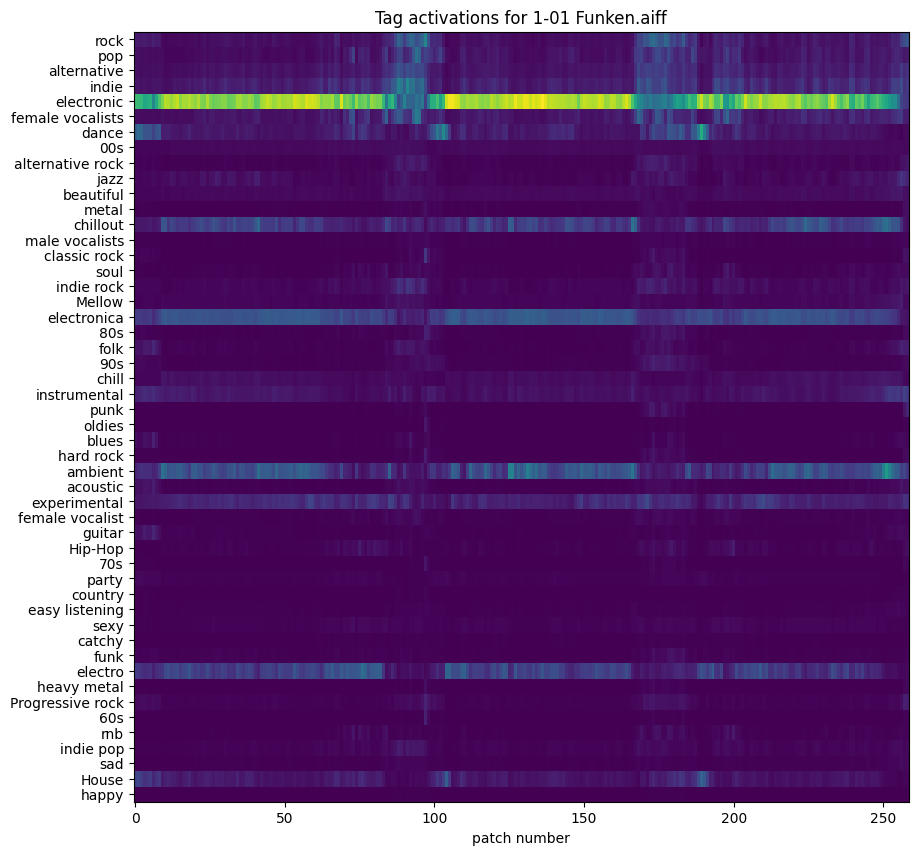

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
activations = TensorflowPredictMusiCNN(graphFilename=embedded_model_path)(audio)
ig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.matshow(activations.T, aspect='auto')
ax.set_yticks(range(len(metadata['classes'])))
ax.set_yticklabels(metadata['classes'])
ax.set_xlabel('patch number')
ax.xaxis.set_ticks_position('bottom')   
plt.title(f'Tag activations for {names["name_0"]}')
plt.show()


[   INFO   ] TensorflowPredict: Successfully loaded graph file: `../models/msd-musicnn-1.pb`


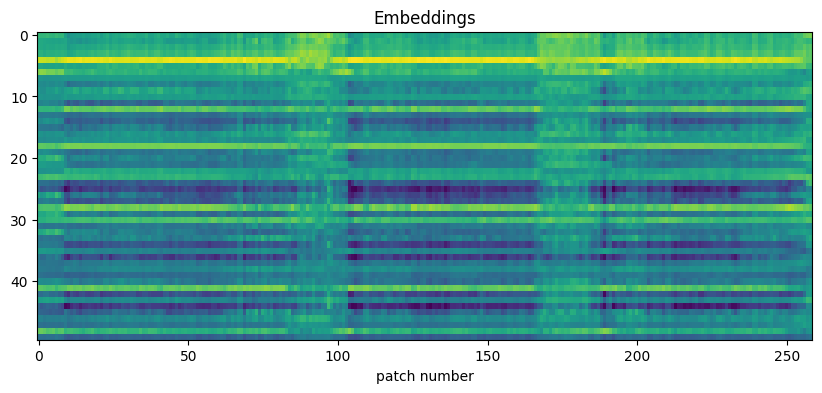

(259, 50)


In [143]:
embeddings = TensorflowPredictMusiCNN(graphFilename=embedded_model_path, output='model/dense_1/BiasAdd')(audio)
ig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.matshow(embeddings.T, aspect='auto')
ax.xaxis.set_ticks_position('bottom')   
ax.set_xlabel('patch number')
plt.title('Embeddings')
plt.show()
print(embeddings.shape)

### Getting Sample Rates

In [ ]:
sample_rates = {}
for i, f in enumerate(data.iterdir()):
    if f.suffix in ['.wav', '.aiff', '.aif', '.aifc', '.flac', '.mp3']:
        sample_rates[f"{f.name}"] = librosa.get_samplerate(f.as_posix())
        
display(sample_rates)

{'37 - Neverland (Aparde Remix).mp3': 48000,
 'Intensity_Fluctuations_-_Ø_[Phase]_(Setaoc_Mass_remix).mp3': 44100,
 'Artaphine - Toru Ikemoto - _080 [Artaphine Premiere].mp3': 44100,
 '01 Testify.flac': 44100,
 '01 Heal My Soul.aiff': 44100,
 '01 Power to the Soul.aiff': 44100,
 'Aus_der_Tiefe_der_Zeit_-_Obscure_Shape,_SHDW_(Original_Mix).mp3': 44100,
 '01. Eh Wut.flac': 44100,
 '1-02 Tide.aiff': 44100,
 'Last_Charms_-_Hyden_(Alarico_Remix)_(SYEP009).mp3': 44100,
 '03 For Marco.aiff': 44100,
 '10 - DJ HEARTSTRING - VISION OF ECSTASY.mp3': 48000,
 'Kolter - Bob Marley - Could you be loved (Kolter Edit).aiff': 44100,
 'Cyclo_-_Traumer_(Original_Mix).mp3': 44100,
 'Uncertain, Alarico - Absence (Original Mix).aiff': 44100,
 '1-01 Funken.aiff': 44100,
 '1-02 Bashment Boogie.aiff': 44100,
 'in_aeternam.aiff': 44100,
 'What To Do (&ME Remix) - Guy Gerber .aiff': 44100,
 '1-02 We Will Bring It Back.aiff': 44100,
 '1-01 Neck Carver.aiff': 44100,
 'Shook_Part_3_-_Nick_Morgan_(Original_Mix).mp3':

In [ ]:
# 1 Read essentia paper on muscinn -> get general idea of architecture, intermediate features, and output
# 2 get the standalone musicnn repo -> go through the musicnn notebook tutorial

# Testing Model Outputs

In [ ]:
audio_path = Path(data / names["name_0"]).as_posix()
embedded_model_path = Path(models / "msd-musicnn-1.pb").as_posix()
classifier_model_path = Path(models / "deam-msd-musicnn-2.pb").as_posix()
audio = MonoLoader(filename= audio_path, sampleRate=16000, resampleQuality=4)()
embedding_model = TensorflowPredictMusiCNN(graphFilename= embedded_model_path, output="model/dense/BiasAdd")
embeddings = embedding_model(audio)

model = TensorflowPredict2D(graphFilename=classifier_model_path, output="model/Identity")
predictions = model(embeddings)